In [6]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")

## parameters and load data

In [2]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/condensate_properties"
os.chdir(folder_save)
color_1x = "#4D5D53"
color_2x = "#856088"

files_1x = []
files_2x = []
for f in os.listdir("all_condensate_AIO_1x"):
    if f.endswith(".csv"):
        files_1x.append(join("all_condensate_AIO_1x", f))

for f in os.listdir("all_condensate_AIO_2x"):
    if f.endswith(".csv"):
        files_2x.append(join("all_condensate_AIO_2x", f))

In [7]:
def robust_normalize(arr):
    median = np.median(arr)
    q1 = np.percentile(arr, 25)
    q3 = np.percentile(arr, 75)
    iqr = q3 - q1
    normalized_arr = (arr - median) / iqr + 1
    return normalized_arr


lst_df = []
for f in track(files_1x, description="1x"):
    df = pd.read_csv(f, usecols=["frame", "area_um2", "mean_intensity", "aspect_ratio"])
    df = df[df["frame"] == 0]
    df["meanInt_norm"] = robust_normalize(df["mean_intensity"].to_numpy(float))
    df["filename"] = np.repeat(basename(f), df.shape[0])
    lst_df.append(df)
df_1x = pd.concat(lst_df, ignore_index=True)
df_1x["label"] = np.repeat("isotonic", df_1x.shape[0])

lst_df = []
for f in track(files_2x, description="2x"):
    df = pd.read_csv(f, usecols=["frame", "area_um2", "mean_intensity", "aspect_ratio"])
    df = df[df["frame"] == 0]
    df["meanInt_norm"] = robust_normalize(df["mean_intensity"].to_numpy(float))
    df["filename"] = np.repeat(basename(f), df.shape[0])
    lst_df.append(df)
df_2x = pd.concat(lst_df, ignore_index=True)
df_2x["label"] = np.repeat("hypertonic", df_2x.shape[0])

df_toplot = pd.concat([df_1x, df_2x], ignore_index=True)

Output()

Output()

## Intensity stats

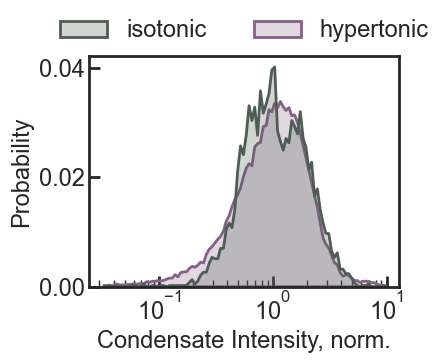

In [33]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot[df_toplot["meanInt_norm"] > 0],
    x="meanInt_norm",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=100,
    binrange=(-1.5, 1),
    common_norm=False,
    element="poly",
    # fill=False,
    log_scale=True,
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, norm.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_contour_meanInt_norm_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

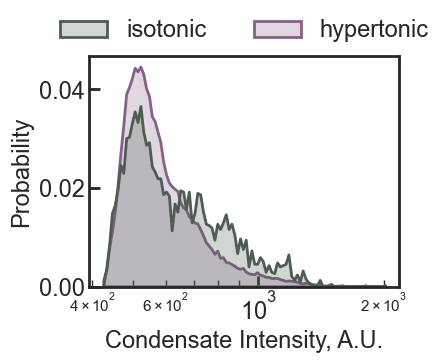

In [34]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot[df_toplot["mean_intensity"] > 0],
    x="mean_intensity",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=100,
    # binrange=(-1.5, 1),
    common_norm=False,
    element="poly",
    # fill=False,
    log_scale=True,
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Intensity, A.U.", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_contour_meanInt_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

## Area

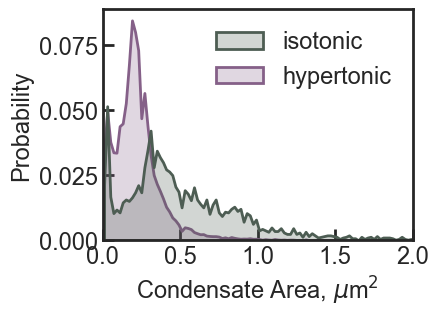

In [36]:
fontsize = 17
plt.figure(figsize=(4, 3))
ax = sns.histplot(
    data=df_toplot,
    x="area_um2",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=100,
    binrange=(0, 2),
    common_norm=False,
    element="poly",
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    0,
    frameon=False,
    title=None,
    fontsize=fontsize,
)
plt.xlim(0, 2)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel(r"Condensate Area, $\mu$m$^2$", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_contour_area_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)

## Aspect Ratio

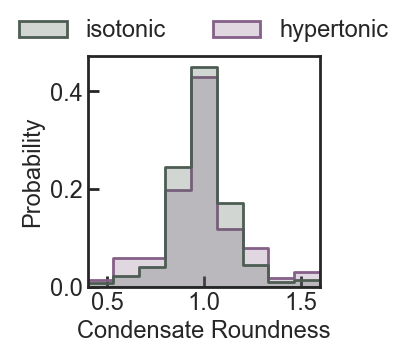

In [45]:
fontsize = 17
plt.figure(figsize=(3, 3))
ax = sns.histplot(
    data=df_toplot,
    x="aspect_ratio",
    hue="label",
    stat="probability",
    hue_order=["isotonic", "hypertonic"],
    palette=[color_1x, color_2x],
    bins=9,
    binrange=(0.4, 1.6),
    common_norm=False,
    element="step",
    lw=2,
)
# other settings
sns.move_legend(
    ax,
    "upper center",
    frameon=False,
    title=None,
    fontsize=fontsize,
    bbox_to_anchor=(0.5, 1.25),
    ncol=2,
)
plt.xlim(0.4, 1.6)
plt.ylabel("Probability", fontsize=fontsize)
plt.xlabel("Condensate Roundness", fontsize=fontsize)
plt.gca().spines[:].set_linewidth(2)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=8,
    width=2,
)
plt.gca().tick_params(
    axis="x",
    which="minor",
    direction="in",
    bottom=True,
    length=5,
    width=1,
)
plt.savefig(
    "hist_contour_AspectRatio_PBvsHOPS.png",
    format="png",
    bbox_inches="tight",
    dpi=300,
)